In [389]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import networkx as nx
from functools import reduce
import pandas as pd
import shutil
import sys
import math
import json
import os.path
from pyomo.environ import *
from pyomo.gdp import *
from pyomo.contrib.latex_printer import latex_printer

In [390]:
# Запись задачи в JSON формат
def WriteJson(dictionary: dict, name = "task.json"):
    with open(name, 'w') as f:
        json.dump(dictionary, f)

# Чтение задачи из JSON формата
def ReadJson(name = "task.json") -> dict:
    with open(name, 'r') as f:
        m = json.loads(f.read())
        return m

## Реализация в Pyomo

In [391]:
#Создание метода решения
def BackpackMachines(ITEMS, MAX_WEIGHT):

    m = ConcreteModel()

    m.J = Set(initialize=ITEMS.keys())
    
    m.count = Var(m.J, domain=NonNegativeIntegers)
    m.sum_cost = Var(domain=NonNegativeReals)
    
    m.OBJ = Objective(expr = m.sum_cost, sense = maximize)

    m.c1 = Constraint(m.J, rule=lambda m, j:
            m.count[j] <= ITEMS[j]["count"])
    
    m.c2 = Constraint(rule=lambda m:
            sum(m.count[j] * ITEMS[j]["weight"] for j in m.J) <= MAX_WEIGHT)
    
    m.c3 = Constraint(rule=lambda m:
            sum(m.count[j] * ITEMS[j]["cost"] for j in m.J) == m.sum_cost)

#     m.display()
    solver = SolverFactory("bonmin", executable=r"..\solvers\ampl.mswin64\bonmin.exe", tee=True)
    solver.solve(m)

    DISTRIBUTIONS = {}
    
    for i in ITEMS.keys():
        DISTRIBUTIONS[i] = m.count[i]()

    return DISTRIBUTIONS, m.OBJ()

In [392]:
def Solve(ITEMS, MAX_WEIGHT):
    
    mas = [(i, ITEMS[i]["count"], ITEMS[i]["cost"] / ITEMS[i]["weight"]) for i in ITEMS.keys()]
    
    mas.sort(key = lambda x: x[-1], reverse = True)
    
    DISTRIBUTIONS = {}
    score = 0
    
    for i, k, cw in mas:
        x = min(math.floor(MAX_WEIGHT / ITEMS[i]["weight"]), k)
        score += x * ITEMS[i]["cost"]
        MAX_WEIGHT -= x * ITEMS[i]["weight"]
        DISTRIBUTIONS[i] = x
    
    return DISTRIBUTIONS, score

In [393]:
def Test(name, verbose = False):
    DATA = ReadJson(name=name)

    #Задание словаря работ
    ITEMS = DATA["ITEMS"]
    MAX_WEIGHT = DATA["MAX_WEIGHT"]

    DISTRIBUTIONS1, score1 = BackpackMachines(ITEMS, MAX_WEIGHT)
    DISTRIBUTIONS2, score2 = Solve(ITEMS.copy(), MAX_WEIGHT)

    if not verbose:
        fig, ax = plt.subplots(1, 2, figsize=(15,7))
        fig.suptitle(f"{name}\nBest: {score1}\nGreedy: {score2}")
    
        ax[0].bar(ITEMS.keys(), [DISTRIBUTIONS1[i] for i in ITEMS.keys()])
        ax[1].bar(ITEMS.keys(), [DISTRIBUTIONS2[i] for i in ITEMS.keys()])
        ax[0].set(yticks=range(0, max(ITEMS[i]["count"] for i in ITEMS) + 1, 1))
        ax[1].set(yticks=range(0, max(ITEMS[i]["count"] for i in ITEMS) + 1, 1))
        ax[0].grid()
        ax[1].grid()
    
    return score1, score2

In [394]:
df = pd.DataFrame(columns=["P2_weight", "P2_cost", "Max_weight", "Score", "Greedy score", "Delta"])
i = 0
for p2_weight in range(1, 51, 7):
    for p2_cost in range(1, 51, 7):
        for max_weight in range(1, p2_weight * 2, 5):
            print(f"[{i}] Solved...")
            DATA = {
                "ITEMS" : {
                    "P1": {"count": 10, "weight": 1, "cost": 2},
                    "P2": {"count": p2_cost, "weight": p2_weight, "cost": 5},
                },
                "MAX_WEIGHT": max_weight
            }

            WriteJson(DATA, "task1.json")
            s1, s2 = Test("task1.json", verbose=True)

            df.loc[i] = [p2_weight, p2_cost, max_weight, s1, s2, abs(s1 - s2)]
            i += 1

[0] Solved...
[1] Solved...
[2] Solved...
[3] Solved...
[4] Solved...
[5] Solved...
[6] Solved...
[7] Solved...
[8] Solved...
[9] Solved...
[10] Solved...
[11] Solved...
[12] Solved...
[13] Solved...
[14] Solved...
[15] Solved...
[16] Solved...
[17] Solved...
[18] Solved...
[19] Solved...
[20] Solved...
[21] Solved...
[22] Solved...
[23] Solved...
[24] Solved...
[25] Solved...
[26] Solved...
[27] Solved...
[28] Solved...
[29] Solved...
[30] Solved...
[31] Solved...
[32] Solved...
[33] Solved...
[34] Solved...
[35] Solved...
[36] Solved...
[37] Solved...
[38] Solved...
[39] Solved...
[40] Solved...
[41] Solved...
[42] Solved...
[43] Solved...
[44] Solved...
[45] Solved...
[46] Solved...
[47] Solved...
[48] Solved...
[49] Solved...
[50] Solved...
[51] Solved...
[52] Solved...
[53] Solved...
[54] Solved...
[55] Solved...
[56] Solved...
[57] Solved...
[58] Solved...
[59] Solved...
[60] Solved...
[61] Solved...
[62] Solved...
[63] Solved...
[64] Solved...
[65] Solved...
[66] Solved...
[67] 

[519] Solved...
[520] Solved...
[521] Solved...
[522] Solved...
[523] Solved...
[524] Solved...
[525] Solved...
[526] Solved...
[527] Solved...
[528] Solved...
[529] Solved...
[530] Solved...
[531] Solved...
[532] Solved...
[533] Solved...
[534] Solved...
[535] Solved...
[536] Solved...
[537] Solved...
[538] Solved...
[539] Solved...
[540] Solved...
[541] Solved...
[542] Solved...
[543] Solved...
[544] Solved...
[545] Solved...
[546] Solved...
[547] Solved...
[548] Solved...
[549] Solved...
[550] Solved...
[551] Solved...
[552] Solved...
[553] Solved...
[554] Solved...
[555] Solved...
[556] Solved...
[557] Solved...
[558] Solved...
[559] Solved...
[560] Solved...
[561] Solved...
[562] Solved...
[563] Solved...
[564] Solved...
[565] Solved...
[566] Solved...
[567] Solved...
[568] Solved...
[569] Solved...
[570] Solved...
[571] Solved...
[572] Solved...
[573] Solved...
[574] Solved...
[575] Solved...
[576] Solved...
[577] Solved...
[578] Solved...
[579] Solved...
[580] Solved...
[581] So

In [395]:
df

,P2_weight,P2_cost,Max_weight,Score,Greedy score,Delta
0,1.0,1.0,1.0,5.0,5.0,0.0
1,1.0,8.0,1.0,5.0,5.0,0.0
2,1.0,15.0,1.0,5.0,5.0,0.0
3,1.0,22.0,1.0,5.0,5.0,0.0
4,1.0,29.0,1.0,5.0,5.0,0.0
...,...,...,...,...,...,...
659,50.0,50.0,76.0,25.0,25.0,0.0
660,50.0,50.0,81.0,25.0,25.0,0.0
661,50.0,50.0,86.0,25.0,25.0,0.0
662,50.0,50.0,91.0,25.0,25.0,0.0


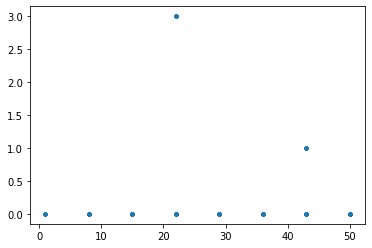

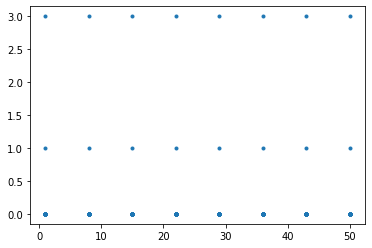

In [396]:
plt.plot(df["P2_weight"], df["Delta"], '.')
plt.show()
plt.plot(df["P2_cost"], df["Delta"], '.')
plt.show()

(52.0, 51)

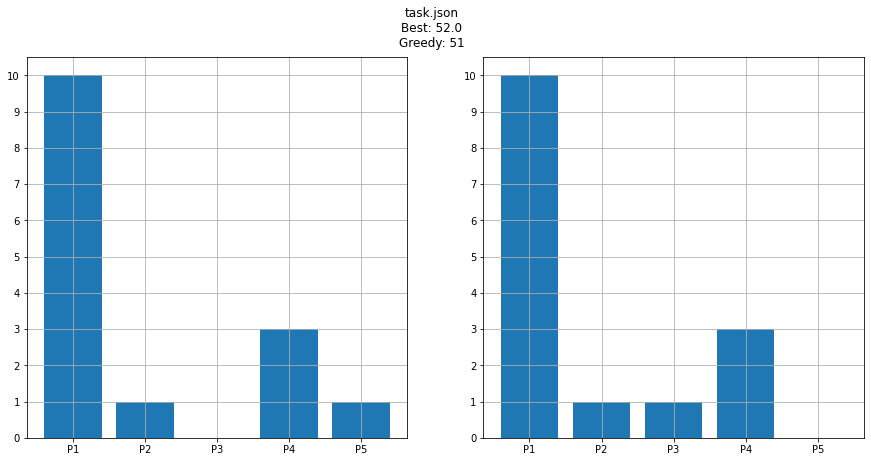

In [397]:
Test("task.json")